In [1]:
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist  #carico le foto dal dataset di keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
plt.rcParams.update({'font.size': 20})

2023-10-06 12:15:47.813446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 12:15:47.851414: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 12:15:47.851872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 12:15:48.518747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>

### Exercise 12: MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**.

#### Load and Process the Data

We load the MNIST data from the web using `load_data()` class.

In [2]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)



Once we have loaded the data, we need to format it in the correct shape.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


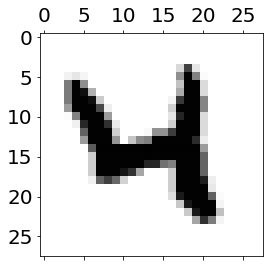

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

### Exercise 12.1

The neural network consists of 3 layers:

- 400 neurons with **ReLU** activation function.
- 100 neurons with **ReLU** activation function.
- Output layer with 10 neurons and **softmax** activation function.

The last layer must be limited to map the output to the 10 digits.

Furthermore, we introduce a 50% dropout, which is a procedure where a portion of the neurons is deactivated for each epoch. This is useful to prevent overfitting, a phenomenon in which the model memorizes individual training data points.

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    print('Model architecture created successfully!')
    return model

def CaCModel(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    model.save_weights(f'weights/model_weights_{opt}.h5')
    print('Model compiled successfully and ready to be trained.')
    return model




We begin addressing the problem by studying the performance variation concerning the number of epochs the system has been trained for.

In order to adjusting the model as necessary and we extend the training duration by increasing the number of epochs from 5 to 15. Additionally, we experiment the Deep Neural Network with different optimizers:

- Stochastic Gradient Descent (SGD).
- (RMSprop)
- (Adam)

While doing so, it's crucial to monitor the accuracy and loss metrics for both the training and validation datasets. So we provide commentary on the model's performance under different optimizer choices.

In [ ]:
# training parameters
batch_size = 32
epochs = 15
optimizers = ('sgd','RMSprop','Nadam','Adagrad')
losses=[]
val_losses=[]
accs=[]
val_accs=[]
for opt in optimizers:
    print("NEW MODEl with optimizer ",opt)
    # create the deep neural net
    model_DNN = CaCModel(opt)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))
    
    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    accs.append(history.history['acc'])
    val_accs.append(history.history['val_acc'])

NEW MODEl with optimizer  sgd
Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7785 - acc: 0.7703 - val_loss: 0.3145 - val_acc: 0.9136
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3851 - acc: 0.8899 - val_loss: 0.2407 - val_acc: 0.9306
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - acc: 0.9115 - val_loss: 0.2086 - val_acc: 0.9389
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2699 - acc: 0.9239 - val_loss: 0.1800 - val_acc: 0.9467
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2410 - acc: 0.9319 - val_loss: 0.1634 - val_acc: 0.9508
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2163 - acc: 0.9381 - val_loss: 0.1463 - val_acc: 0.9571
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - lo

In [ ]:
# look into training history
plt.subplots(figsize=(18,15))
plt.subplot(2,1,1)
for i in range(len(optimizers)):
    plt.plot(losses[i],linewidth = 4,label=f"Train {optimizers[i]}")
    #plt.plot(val_losses[i],linewidth = 4,label=f"Validation {optimizers[i]}")
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs [#]')
plt.legend( loc='best')

# summarize history for loss
plt.subplot(2,1,2)
plt.title('Model Accuracy', fontsize=16)
for i in range(len(optimizers)):
    plt.plot(accs[i],linewidth = 4,label=f"Train {optimizers[i]}")
    #plt.plot(val_accs[i],linewidth = 4,label=f"Validation {optimizers}")
plt.ylabel('Accuracy')
plt.xlabel('Epochs [#]')
plt.grid()
plt.legend( loc='best')
plt.show()


The sgd Optimizer have the lowest loss function along the epochs. It reachs the minimum when the Adam optimizator already did. On the other hand the RMSprop reach the the minimum loss value after only 2 epochs but then araise again. That's probably due to the overfitting problem and maybe the dropout acts less well for the selected optimizer. The optimizer the minimize the loss funciton and maximaze the efficiency is the Nadam.

Now we will shows the validation tests for the previous DNN models.

In [ ]:
# look into training history
plt.subplots(figsize=(18,15))
plt.subplot(2,1,1)
for i in range(len(optimizers)):
    #plt.plot(losses[i],linewidth = 4,label=f"Train {optimizers}")
    plt.plot(val_losses[i],linewidth = 4,label=f"Validation {optimizers[i]}")
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs [#]')
plt.legend( loc='best')

# summarize history for loss
plt.subplot(2,1,2)
plt.title('Model Accuracy', fontsize=16)
for i in range(len(optimizers)):
    #plt.plot(accs[i],linewidth = 4,label=f"Train {optimizers[i]}")
    plt.plot(val_accs[i],linewidth = 4,label=f"Validation {optimizers[i]}")
plt.ylabel('Accuracy')
plt.xlabel('Epochs [#]')
plt.grid()
plt.legend( loc='best')
plt.show()

#### Observation


High accuracy and low loss function value are confirmed for the **Nadam** optimizer.
The number of epochs can then be reduced to the resonable number of **8 epochs**.

In [ ]:
print("MODEl with optimizer Nadam")
# create the deep neural net
epochs = 8
model_DNN = CaCModel('Nadam')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
    
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(23, 15)) 
for i in range(15):    
    ax = plt.subplot(2, 15, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

#### Conclusion
The Parameter found respond with high accuracy and low loss value after only 8 epochs.
The test above shows that the model is good enought to predict the 10 digits above.

### Exercise 12.2 : Creating Convolutional Neural Nets (CNN)

Now we would like to improve the accuracy of our model exploiting the *translational invariance* of the totality of the pixels and the *local* spatial correlations between the pixels. This is possible introducing Convulutional neural nets.

To face it, we first need to reshape the training and test input data as follows

In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
#serve a portarlo nel formato della figura
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Change the architecture of the DNN model using convolutional layers. We consider:

- 10 neurons for the **Conv2D** with **ReLU** activation function.
- 10 neurons for the **MaxPooling2D** with **ReLU** activation function. 
- 5 neurons for the **Conv2D** with **ReLU** activation function.

Then the DNN before defined:
- 400 neurons with **ReLU** activation function.
- 100 neurons with **ReLU** activation function.
- Output layer with 10 neurons and **softmax** activation function.

In [ ]:
def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu',input_shape=input_shape))                
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(5,(5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(400, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))  
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['acc'])
    return model

In [ ]:
# training parameters
batch_size = 32
epochs = 8

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# look into training history
plt.subplots(figsize=(18,15))
plt.subplot(2,1,1)

plt.plot(history.history['loss'],linewidth = 4,label="Train")
plt.plot(history.history['val_loss'],linewidth = 4,label="Validation ")
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs [#]')
plt.legend( loc='best')

# summarize history for loss
plt.subplot(2,1,2)
plt.title('Model Accuracy', fontsize=16)

plt.plot(history.history['acc'],linewidth = 4,label="Train")
plt.plot(history.history['val_acc'],linewidth = 4,label="Validation ")
plt.ylabel('Accuracy')
plt.xlabel('Epochs [#]')
plt.grid()
plt.legend( loc='best')
plt.show()

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(23, 15)) 
for i in range(15):    
    ax = plt.subplot(2, 15, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


#### Conclusion
We introduced the new convolution model wich perform well also if it reduce the accuracy of the DNN model.

### Exercise 12.3

Let's try with 10 pictures of mine "handwritten" digits.

In [ ]:
from PIL import Image
import os
datas=[]
predictions=[]
filenames = {"one","two","three","four","five","six","seven","eight","nine"}

for name in filenames:
    digit_filename = f"./mydigits/{name}.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(data)
    predictions.append(pred_0)
    data = data.reshape(xdim,ydim)
    datas.append(data)


I use the previously trained DNN to predict the digit:

In [ ]:
plt.figure(figsize=(23, 15)) 
for i in range(9):    
    ax = plt.subplot(2, 15, i + 1)    
    plt.imshow(datas[i], cmap='gray')    
    plt.title(f"Predicted: {np.argmax(predictions[i])}" )   
    plt.axis('off') 
plt.show()


#### Conclusion
The CNN model predict well all the digits look-likes training ones. For example the 4 been written in an other way is not predicted. That is, the neural network is incapable of predicting data in areas outside the training range.